https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

https://www.kaggle.com/code/sahistapatel96/mushroom-classification

streamlit

1. Install the Kaggle library

        - ! pip install kaggle

        
2. Make a directory named “.kaggle”

        - ! mkdir ~/.kaggle


3. Copy the “kaggle.json” into this new directory

        - ! cp kaggle.json ~/.kaggle/


4. Allocate the required permission for this file.

        - ! chmod 600 ~/.kaggle/kaggle.json


In [8]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 435.7 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 291.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB 653.6 kB/s eta 0:00:14
   ---------------------------------------- 0.1/9.1 MB 880.9 kB/s eta 0:00:11
   ---------------------------------------- 0.1/9.1 MB 819.2 kB/s eta 0:00:12
   ---------------------------------------- 0.1/9.1 MB 819.2 kB/s eta 0:00:12
   


[notice] A new release of pip is available: 23.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Imports

In [2]:
#Data handling Imports
import pandas as pd
import numpy as np

#Visualizing Data Imports
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


#Notebook arrange Imports
import warnings
warnings.filterwarnings('ignore')

#Encoding Imports
from sklearn.preprocessing import LabelEncoder

#Feature Selection Imports
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import GenericUnivariateSelect

#Sampling Imports
from sklearn.model_selection import KFold

#Scaling Imports
from sklearn.preprocessing import StandardScaler

#Modeling Imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#Pre-processing Imports
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint


#Accuracy Validation Imports
from sklearn import metrics
from sklearn.metrics import auc, roc_curve, f1_score, accuracy_score,precision_recall_curve,\
confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

#Model Interpretation Imports
#import eli5, shap


#Other required libraries
import time
start = time. time()

Read file

In [3]:
file =('mushrooms.csv')

In [4]:
data = pd.read_csv(file)

In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [15]:
data["gill-color"].unique()

array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
      dtype=object)

# Visulization using Dummy DataFrame

In [7]:
# Copiying actual dataframe to another for EDA- Visualisation
df_eda = data.copy()

# Changing all the column data with its expansion and keeping it in dict which will be used for visualisation to find the relations b/w TGT variable

classes = dict(p='Poisonous', e='Edible')
cap_shape = dict(b='bell', c='conical', x='convex', f='flat', k='knobbed', s='sunken')
cap_surface = dict(f='fibrous', g='grooves', y='scaly', s='smooth')
cap_color = dict(n='brown', b='buff', c='cinnamon', g='gray', r='green', p='pink', u='purple', e='red', w='white', y='yellow')
gill_attachment = dict(a='attached', d='descending', f='free', n='notched')
gill_spacing = dict(c='close', w='crowded', d='distant')
gill_size = dict(b='broad', n='narrow')
gill_color = dict(n='brown', b='buff', g='gray', r='green', p='pink', u='purple', o='orange',h='chocolate', k='black', e='red', w='white', y='yellow')
stalk_shape = dict(e='enlarging',t='tapering')
stalk_root = {'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted', '?':'missing'}
stalk_surface_above_ring = dict(f='fibrous',y='scaly',k='silky',s='smooth')
stalk_surface_below_ring = dict(f='fibrous',y='scaly',k='silky',s='smooth')
stalk_color_above_ring = dict(n='brown', b='buff', c='cinnamon', g='gray', o='orange', p='pink', e='red',w='white', y='yellow')
stalk_color_below_ring = dict(n='brown', b='buff', c='cinnamon', g='gray', o='orange', p='pink', e='red',w='white', y='yellow')
veil_color = dict(n='brown', o='orange', w='white', y='yellow')
ring_number = dict(n='None', o='One', t='Two')
ring_type = dict(c='cobwebby', e='evanescent', f='flaring', l='large', n='none', p='pendant', s='sheathing', z='zone')
bruises = dict(t='True', f='False')
odor = dict(a='almond', l='anise', c='creosote', y='fishy', f='foul', m='musty', n='none', p='pungent', s='spicy')
spore_print_color = dict(k='black', n='brown', b='buff', h='chocoloate', r='green', o='Orange', u='Purple',w='White', y='Yellow')
population = dict(a='abundant', c='clustered', n='numerous', s='scattered', v='several', y='solitary')
habitat = dict(g='grasses', l='leaves', m='meadows', p='paths', u='urban', w='waste', d='woods')

#Mapping the dict to the new dataframe with all the abbreviations
df_eda['class'] = df_eda['class'].map(classes)

df_eda['cap-shape'] = df_eda['cap-shape'].map(cap_shape)
df_eda['cap-surface'] = df_eda['cap-surface'].map(cap_surface)
df_eda['cap-color'] = df_eda['cap-color'].map(cap_color)

df_eda['gill-attachment'] = df_eda['gill-attachment'].map(gill_attachment)
df_eda['gill-spacing'] = df_eda['gill-spacing'].map(gill_spacing)
df_eda['gill-size'] = df_eda['gill-size'].map(gill_size)
df_eda['gill-color'] = df_eda['gill-color'].map(gill_color)

df_eda['stalk-shape'] = df_eda['stalk-shape'].map(stalk_shape)
df_eda['stalk-root'] = df_eda['stalk-root'].map(stalk_root)
df_eda['stalk-surface-above-ring'] = df_eda['stalk-surface-above-ring'].map(stalk_surface_above_ring)
df_eda['stalk-surface-below-ring'] = df_eda['stalk-surface-below-ring'].map(stalk_surface_below_ring)
df_eda['stalk-color-above-ring'] = df_eda['stalk-color-above-ring'].map(stalk_color_above_ring)
df_eda['stalk-color-below-ring'] = df_eda['stalk-color-below-ring'].map(stalk_color_below_ring)

df_eda['veil-color'] = df_eda['veil-color'].map(veil_color)
df_eda['ring-number'] = df_eda['ring-number'].map(ring_number)
df_eda['ring-type'] = df_eda['ring-type'].map(ring_type)

df_eda['bruises'] = df_eda['bruises'].map(bruises)
df_eda['odor'] = df_eda['odor'].map(odor)
df_eda['spore-print-color'] = df_eda['spore-print-color'].map(spore_print_color)
df_eda['population'] = df_eda['population'].map(population)
df_eda['habitat'] = df_eda['habitat'].map(habitat)

#Checking result
df_eda.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,p,white,One,pendant,black,scattered,urban
1,Edible,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,p,white,One,pendant,brown,numerous,grasses
2,Edible,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,p,white,One,pendant,brown,numerous,meadows
3,Poisonous,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,p,white,One,pendant,black,scattered,urban
4,Edible,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,p,white,One,evanescent,brown,abundant,grasses


In [59]:
X_feature.columns

Index(['cap-shape', 'cap-color', 'odor', 'gill-attachment', 'class',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-type', 'spore-print-color',
       'population'],
      dtype='object')

In [77]:
df_eda['population'].unique()

array(['scattered', 'numerous', 'abundant', 'several', 'solitary',
       'clustered'], dtype=object)

In [9]:
mushroomsData = df_eda.copy()
mushroomsData.drop("veil-type",axis=1,inplace=True)
mushroomsData.loc[mushroomsData["gill-color"] == "chocolate", 'gill-color'] = "brown"

In [10]:
count = 0
for color in mushroomsData["gill-color"].unique():
  count = mushroomsData["gill-color"].where(mushroomsData["gill-color"] == color).count()
  if count < 100:
    indexGillColor = mushroomsData[mushroomsData['gill-color'] == color].index
    mushroomsData.drop(indexGillColor , inplace=True)
  else:
    print("Gill color: " + color + ", count: " + str(count))

Gill color: black, count: 408
Gill color: brown, count: 1780
Gill color: gray, count: 752
Gill color: pink, count: 1492
Gill color: white, count: 1202
Gill color: purple, count: 492
Gill color: buff, count: 1728


In [11]:
mushroomsData.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,One,pendant,black,scattered,urban
1,Edible,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,smooth,white,white,white,One,pendant,brown,numerous,grasses
2,Edible,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,One,pendant,brown,numerous,meadows
3,Poisonous,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,One,pendant,black,scattered,urban
4,Edible,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,One,evanescent,brown,abundant,grasses


In [12]:
data_check = mushroomsData.head()
data_check = data_check.append(mushroomsData.tail())
data_check

AttributeError: 'DataFrame' object has no attribute 'append'

# Gill-color count


In [13]:
list(mushroomsData["gill-color"].unique())

['black', 'brown', 'gray', 'pink', 'white', 'purple', 'buff']

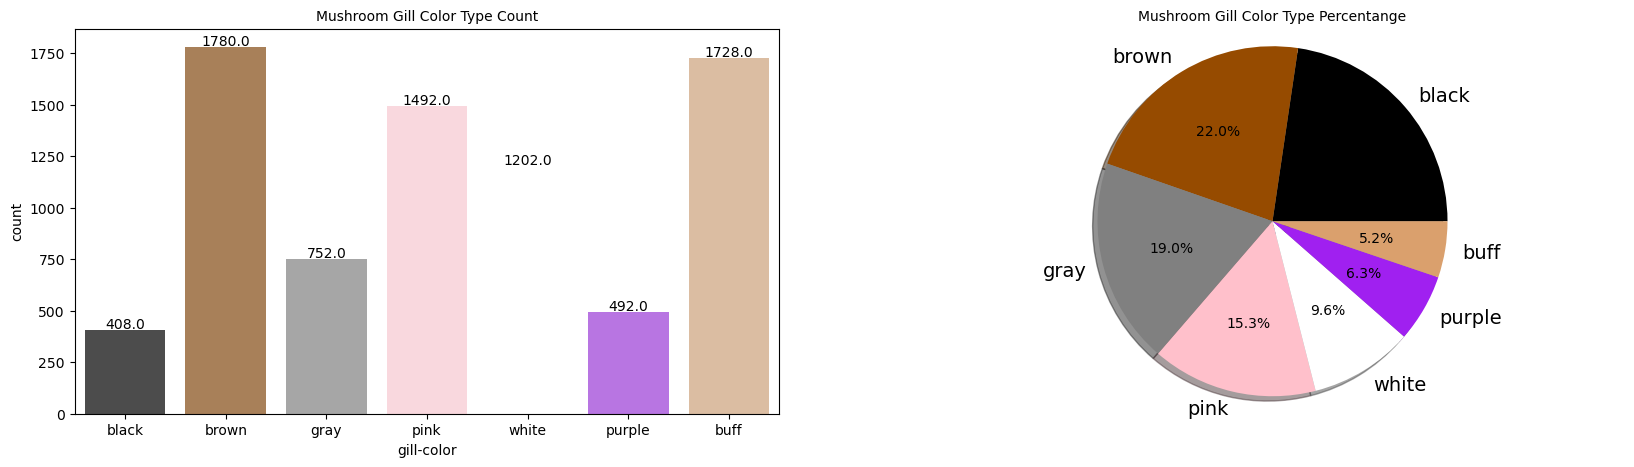

In [14]:
plt.rcParams['figure.figsize']=20,5

colors = ['#000000', '#964B00', '#808080', '#FFC0CB', '#FFFFFF', '#A020F0', '#DAA06D']

mush_gill_colorpie = mushroomsData['gill-color'].value_counts()
mush_size = mush_gill_colorpie.values.tolist()
mush_types = mush_gill_colorpie.axes[0].tolist()
mush_labels = list(mushroomsData["gill-color"].unique())

plt.subplot(121)
plt.title('Mushroom Gill Color Type Count', fontsize=10)
sb.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
s = sb.countplot(x = "gill-color", data = mushroomsData, alpha=0.7, palette = colors, order = mush_labels)

for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 4),
                textcoords = 'offset points')

ax = plt.subplot(122)
plt.title('Mushroom Gill Color Type Percentange', fontsize=10)
patches, texts, autotexts = plt.pie(mush_size, labels=mush_labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
for text,autotext in zip(texts,autotexts):
    if float(autotext.get_text()[:-1]) < 5.0:
      autotext.set_visible(False)
      text.set_visible(False)
    else:
      autotext.set_fontsize(10)
      text.set_fontsize(14)

plt.axis('equal')
plt.show()

In [15]:
mush_gill_colorpie

gill-color
brown     1780
buff      1728
pink      1492
white     1202
gray       752
purple     492
black      408
Name: count, dtype: int64

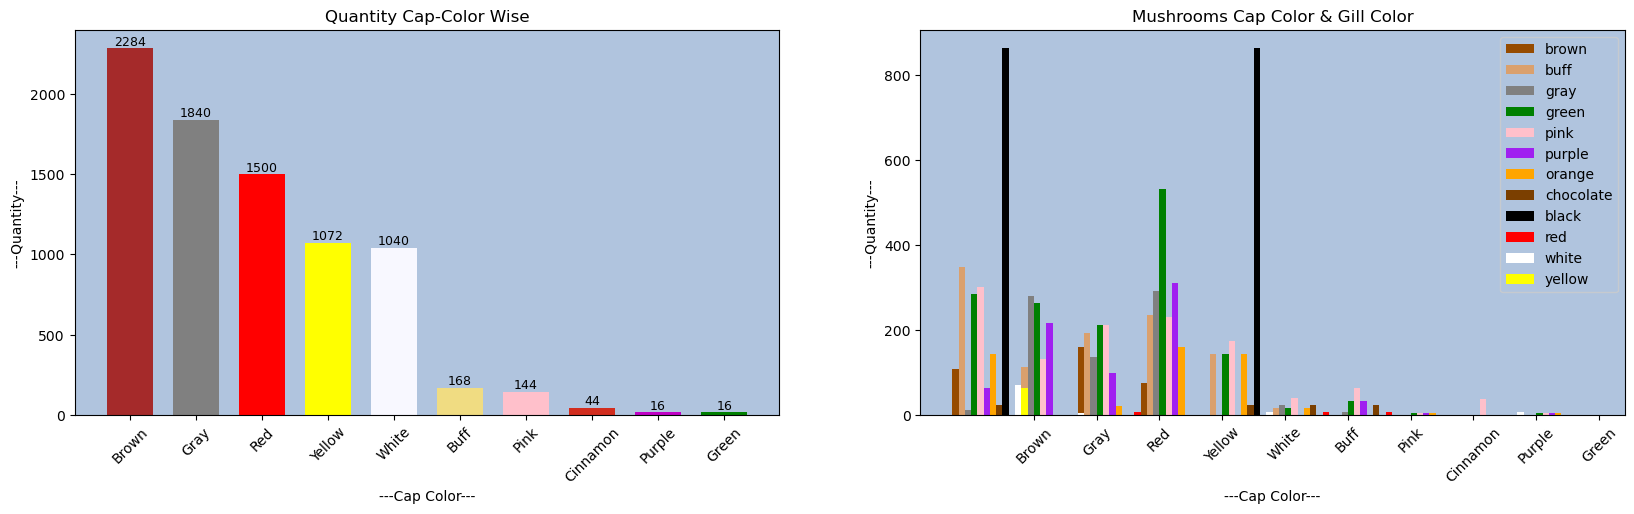

In [16]:
#Auto-labels the number of mushrooms for each bar color.
def label(bars,fontsize=9):
    """ Displaying the count of each colour on top of the bar """
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)

#Visualizing Data cap-color wise count
plt.rcParams['figure.figsize']=20,5
ax = plt.subplot(121)
cap_colors = df_eda['cap-color'].value_counts()
m_height = cap_colors.values.tolist()
#Row labels
cap_colors.axes
#Converts index to list
cap_color_labels = cap_colors.axes[0].tolist()
#the x locations for the groups
ind = np.arange(10)
#Setting width of the bars
width = 0.7
colors = ['brown','gray','red','yellow','#f8f8ff','#F0DC82','pink','#D22D1E','#C000C5','g']
mushroom_bars = ax.bar(ind, m_height , width, color=colors)
#Setting labels, title and axes ticks
ax.set_xlabel('---Cap Color---',fontsize=10)
ax.set_ylabel('---Quantity---',fontsize=10)
ax.set_title('Quantity Cap-Color Wise',fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(('Brown', 'Gray','Red','Yellow','White','Buff','Pink','Cinnamon','Purple','Green'), fontsize = 10, rotation=45)
label(mushroom_bars)



ax = plt.subplot(122)
bar_base_lists = []
colors = ['#964B00', '#DAA06D', '#808080', '#008000', '#FFC0CB', '#A020F0', '#FFA500', '#7B3F00', '#000000', '#FF0000', '#FFFFFF', '#FFFF00']

for gillColor in df_eda['gill-color'].unique():
  gill_cc_list = []
  for capColor in df_eda['cap-color'].unique():
    gill_cc = len(df_eda[(df_eda['cap-color'] == capColor) & (df_eda['gill-color'] == gillColor)].index)
    gill_cc_list.append(gill_cc)
  bar_base_lists.append(gill_cc_list)
width = 0.1


bars = []

for i in range(0,len(bar_base_lists)):
  bar = ax.bar(ind, bar_base_lists[i] , width, color=colors[i])
  bars.append(bar)
  ind = ind+width

#Add some text for labels, title and axes ticks
ax.set_xlabel('---Cap Color---',fontsize=10)
ax.set_ylabel('---Quantity---',fontsize=10)
ax.set_title('Mushrooms Cap Color & Gill Color',fontsize=12)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('Brown', 'Gray','Red','Yellow','White','Buff','Pink','Cinnamon','Purple','Green'), fontsize = 10, rotation=45)
ax.legend(bars,('brown', 'buff', 'gray', 'green', 'pink', 'purple', 'orange', 'chocolate', 'black', 'red', 'white', 'yellow'),fontsize=10)

plt.show()

In [17]:
#print details statistical summary
mushroomsData.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,7854,7854,7854,7854,7854,7854,7854,7854,7854,7854,...,7854,7854,7854,7854,7854,7854,7854,7854,7854,7854
unique,2,6,4,10,2,9,2,2,2,7,...,4,4,9,9,4,3,5,9,6,7
top,Edible,convex,scaly,brown,False,none,free,close,broad,brown,...,smooth,smooth,white,white,white,One,pendant,White,several,woods
freq,3984,3586,3162,2126,4598,3276,7781,6546,5346,1780,...,4928,4688,4392,4312,7786,7356,3816,2270,3952,3130


In [18]:
#Count Of unique values of each columns
mushroomsData.nunique().sort_values()

class                        2
gill-size                    2
gill-spacing                 2
gill-attachment              2
stalk-shape                  2
bruises                      2
ring-number                  3
stalk-surface-below-ring     4
cap-surface                  4
stalk-surface-above-ring     4
veil-color                   4
ring-type                    5
stalk-root                   5
cap-shape                    6
population                   6
habitat                      7
gill-color                   7
stalk-color-above-ring       9
spore-print-color            9
stalk-color-below-ring       9
odor                         9
cap-color                   10
dtype: int64

In [19]:
# Taking the feature columns in a list
feat_cols = ['class','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']
label_encoder = LabelEncoder()

df_1 = mushroomsData.apply(label_encoder.fit_transform)

X = df_1[feat_cols].reset_index().drop(columns = ["index"])
Y = df_1['gill-color'].reset_index().drop(columns = ["index"])

print('X structure:',X.shape)
print('Y structure:',Y.shape)

X structure: (7854, 21)
Y structure: (7854, 1)


In [120]:
mushroomsData["stalk-shape"].unique()

array(['enlarging', 'tapering'], dtype=object)

In [121]:
X_feature.columns

Index(['cap-shape', 'cap-color', 'odor', 'gill-attachment', 'class',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-type', 'spore-print-color',
       'population'],
      dtype='object')

In [130]:
df_1['population'].unique()

array([3, 2, 0, 4, 5, 1])

In [140]:
model_list = ['gill_color_classifier_DTree_model.pkl', 'gill_color_classifier_LR_model.pkl', 'gill_color_classifier_RF_model.pkl', 'gill_color_classifier_SVM_model.pkl']
model_label = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'SVM']

In [142]:
model_list[model_label.index('Decision Tree')]

'gill_color_classifier_DTree_model.pkl'

In [ ]:
"""
cap_shape - array([2, 0, 5, 3, 4, 1])
cap_color - array([0, 9, 8, 3, 7, 5, 1, 6, 2, 4])
odor - array([7, 0, 1, 6, 4, 2, 3, 8, 5])
gill_attachment - array([1, 0])
class_ - array([1, 0])
stalk_shape - array([0, 1])
stalk_root - array([2, 1, 0, 4, 3])
stalk_surface_above_ring - array([3, 0, 2, 1])
stalk_surface_below_ring - array([3, 0, 1, 2])
stalk_color_above_ring - array([7, 3, 5, 0, 1, 6, 2, 4, 8])
stalk_color_below_ring - array([7, 5, 3, 1, 0, 8, 6, 2, 4])
ring_type - array([4, 0, 2, 1, 3])
spore_print_color - array([4, 5, 1, 7, 2, 8, 3, 0, 6])
population - array([3, 2, 0, 4, 5, 1])
"""

<Axes: >

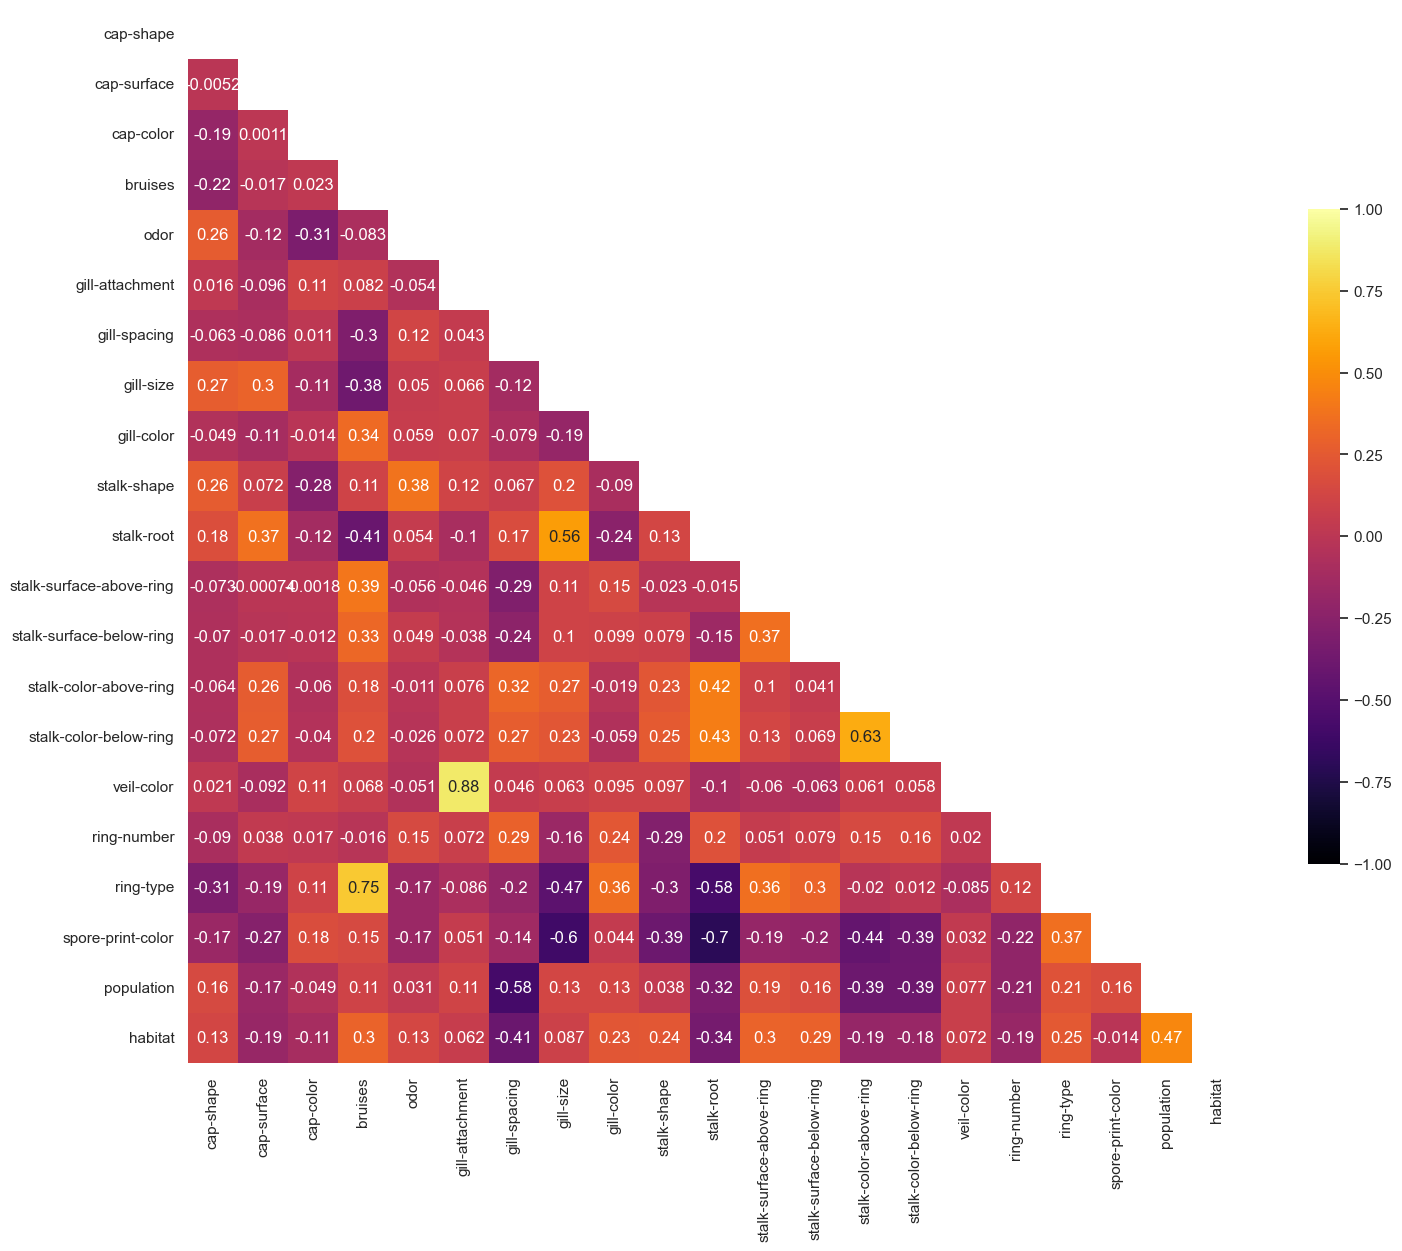

In [20]:
#correlation with top features

sb.set(font_scale=1)

# Set background color of corr matrix to White
sb.set_style("white")

# Compute the correlation matrix without target variable
corr = df_1.iloc[:,1:].corr()
top_features = corr.index

#corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr = df_1[top_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(corr)

# Set up the matplotlib figure
plt.figure(figsize=(17,17))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap="inferno", annot=True, fmt = '.2g', vmax=1,vmin = -1,center=0,
           square=True, cbar_kws={"shrink": 0.5})

In [21]:
# Apply SelectKBest Algorithm using chi2 score function
kbest_features = SelectKBest(score_func=chi2, k=20)

ord_features = kbest_features.fit(X, Y)
df_scores = pd.DataFrame(ord_features.scores_, columns=["Score"])
df_columns = pd.DataFrame(X.columns)
k_features = pd.concat([df_columns, df_scores], axis=1)
k_features.columns=['Features','Score']
k_features

,Features,Score
0,class,1478.632158
1,cap-shape,265.409208
2,cap-surface,964.757794
3,cap-color,970.531937
4,bruises,1530.253235
5,odor,306.663163
6,gill-attachment,1.705859
7,gill-spacing,662.433215
8,gill-size,3236.527765
9,stalk-shape,1081.771067


In [22]:
k_features.nlargest(15, 'Score').style.hide_index()

AttributeError: 'Styler' object has no attribute 'hide_index'

In [23]:
# Lets try an ensemble model to find the top features in our dataset
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.11674201 0.00303754 0.01704357 0.00808996 0.06184901 0.02789688
 0.00548685 0.03902983 0.13683318 0.12176429 0.09881687 0.01245643
 0.01888021 0.0101592  0.01374075 0.00402676 0.02315659 0.11134824
 0.11838918 0.02825724 0.0229954 ]


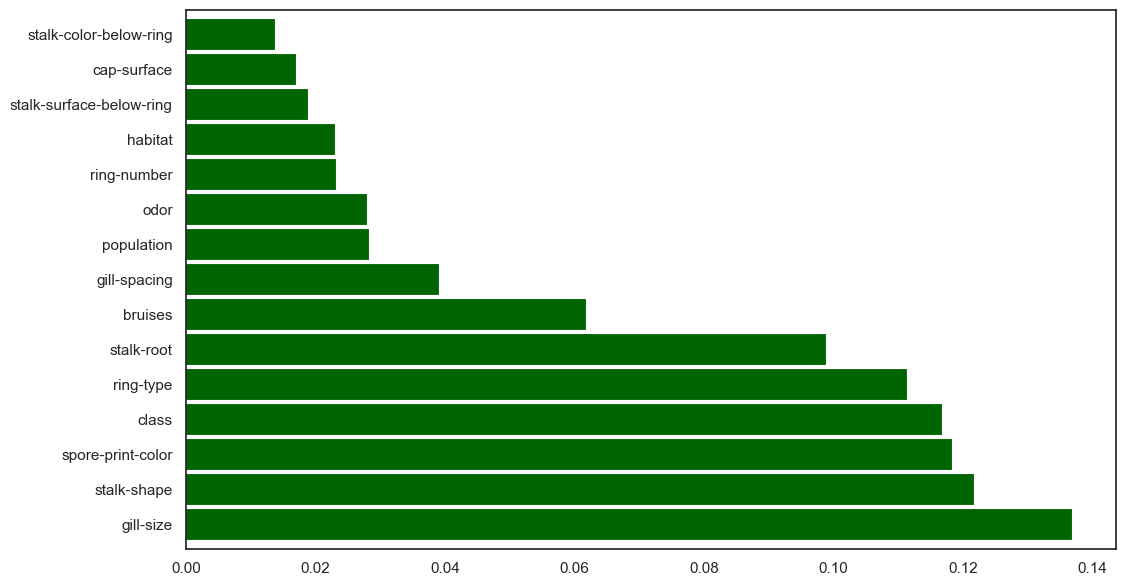

In [24]:
# Finding the top ranked fetures and plotting
ranked_features = pd.Series(model.feature_importances_, index = X.columns)
plt.figure(figsize=(12, 7))
ranked_features.nlargest(15).plot(kind='barh', color='darkgreen',  width =0.9 , linewidth = 0.1)
plt.show()

Mutual_info_classif
It estimates mutual information for a discrete target variable between two random variables which is a non-negative value, which measures the mutual information between a matrix containing a set of feature vectors and the target.

It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [25]:
mutual_info = mutual_info_classif(X, Y)
mutual_data = pd.Series(mutual_info, index = X.columns)
mutual_data.sort_values(ascending=False)

spore-print-color           0.504442
stalk-root                  0.429132
ring-type                   0.423707
gill-size                   0.328118
odor                        0.328058
population                  0.244237
class                       0.237232
stalk-shape                 0.232859
bruises                     0.204456
stalk-color-above-ring      0.165433
stalk-color-below-ring      0.163424
stalk-surface-below-ring    0.162699
stalk-surface-above-ring    0.141210
cap-shape                   0.121656
cap-surface                 0.112052
habitat                     0.103273
ring-number                 0.071784
gill-spacing                0.058882
gill-attachment             0.017771
cap-color                   0.008365
veil-color                  0.000000
dtype: float64

Select KBest removes all but the highest scoring features.

Select Percentile removes all but a user-specified highest scoring percentage of features.

In [117]:
df_1[['class', 'gill-color']] = df_1[['gill-color','class']]
gillColor = df_1.columns.array[9]
df_1.columns.array[9] = df_1.columns.array[0]
df_1.columns.array[0] = gillColor

In [113]:
#trans = GenericUnivariateSelect(score_func=mutual_info_classif, mode='k_best', param=15)
trans = GenericUnivariateSelect(score_func = mutual_info_classif, mode='percentile', param = 70)
trans_feat = trans.fit_transform(X, Y)
columns_ = df_1.iloc[:, 1:].columns[trans.get_support()].values

# X_feature as tranformed top feature variables
X_feature = pd.DataFrame(trans_feat, columns=columns_)

# Y_label with only target variable
Y_label = Y

X_feature.columns

Index(['cap-shape', 'cap-color', 'odor', 'gill-attachment', 'class',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-type', 'spore-print-color',
       'population'],
      dtype='object')

In [114]:
X_feature

,cap-shape,cap-color,odor,gill-attachment,class,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population
0,1,3,1,7,1,0,2,3,3,7,7,4,4,3
1,0,3,1,0,0,0,1,3,3,7,7,4,5,2
2,0,3,1,1,0,0,1,3,3,7,7,4,5,2
3,1,2,1,7,1,0,2,3,3,7,7,4,4,3
4,0,3,0,6,0,1,2,3,3,7,7,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849,1,2,0,8,1,1,3,3,2,5,7,0,2,4
7850,1,3,0,3,1,1,3,2,3,5,7,0,2,4
7851,1,2,0,4,1,1,3,2,3,5,7,0,2,4
7852,0,3,0,6,0,0,3,3,3,4,4,4,6,1


# Data Sampling
KFold Train/Test Split

In [28]:
skf = KFold(n_splits=5)
for train_index,test_index in skf.split(X_feature, Y_label):
  print("TEST: " + str(test_index))
  print("TRAIN: " + str(train_index))


TEST: [   0    1    2 ... 1568 1569 1570]
TRAIN: [1571 1572 1573 ... 7851 7852 7853]
TEST: [1571 1572 1573 ... 3139 3140 3141]
TRAIN: [   0    1    2 ... 7851 7852 7853]
TEST: [3142 3143 3144 ... 4710 4711 4712]
TRAIN: [   0    1    2 ... 7851 7852 7853]
TEST: [4713 4714 4715 ... 6281 6282 6283]
TRAIN: [   0    1    2 ... 7851 7852 7853]
TEST: [6284 6285 6286 ... 7851 7852 7853]
TRAIN: [   0    1    2 ... 6281 6282 6283]


In [29]:
skf = KFold(n_splits=5)
for train_index,test_index in skf.split(X_feature, Y_label):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_feature.loc[train_index],X_feature.loc[test_index]
    Y_train, Y_test = Y_label.loc[train_index],Y_label.loc[test_index]

TRAIN: [1571 1572 1573 ... 7851 7852 7853] TEST: [   0    1    2 ... 1568 1569 1570]
TRAIN: [   0    1    2 ... 7851 7852 7853] TEST: [1571 1572 1573 ... 3139 3140 3141]
TRAIN: [   0    1    2 ... 7851 7852 7853] TEST: [3142 3143 3144 ... 4710 4711 4712]
TRAIN: [   0    1    2 ... 7851 7852 7853] TEST: [4713 4714 4715 ... 6281 6282 6283]
TRAIN: [   0    1    2 ... 6281 6282 6283] TEST: [6284 6285 6286 ... 7851 7852 7853]


 # Feature Scaling

In [30]:
# Apply standardization on numerical features
scale = StandardScaler()

# fit on training data column
scale.fit(X_train)

# transform the training and test data
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

#Total no. of rows in the features set
print(f'Total no. of Train Features data: {X_train.shape[0]}')
print(f'Total no. of Test Features data: {X_test.shape[0]}')

#Total no. of rows in the label set
print(f'Total no. of Train Label data: {Y_train.shape[0]}')
print(f'Total no. of Test Label data: {Y_test.shape[0]}')

Total no. of Train Features data: 6284
Total no. of Test Features data: 1570
Total no. of Train Label data: 6284
Total no. of Test Label data: 1570


In [57]:
X_feature

,cap-shape,cap-color,odor,gill-attachment,class,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population
0,1,3,1,7,1,0,2,3,3,7,7,4,4,3
1,0,3,1,0,0,0,1,3,3,7,7,4,5,2
2,0,3,1,1,0,0,1,3,3,7,7,4,5,2
3,1,2,1,7,1,0,2,3,3,7,7,4,4,3
4,0,3,0,6,0,1,2,3,3,7,7,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849,1,2,0,8,1,1,3,3,2,5,7,0,2,4
7850,1,3,0,3,1,1,3,2,3,5,7,0,2,4
7851,1,2,0,4,1,1,3,2,3,5,7,0,2,4
7852,0,3,0,6,0,0,3,3,3,4,4,4,6,1


# Modeling

In [33]:
lr = LogisticRegression(solver="lbfgs")
lr.fit(X_train,Y_train)
Y_predict = lr.predict(X_test)
print("Test Accuracy: {}%".format(round(lr.score(X_test,Y_test)*100,2)))

Test Accuracy: 78.66%


In [32]:
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    if knn.score(X_test,Y_test) > best_score:
        best_score = knn.score(X_train,Y_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

Best KNN Value: 9
Test Accuracy: 39.24%


# DecisionTreeClassifier

In [34]:
D_tree = DecisionTreeClassifier()

D_tree.fit(X_train, Y_train)

Y_predict = D_tree.predict(X_train)

print("Train Data Model Accuracy: {0:.3f}".format(metrics.accuracy_score(Y_train, Y_predict)*100))

Y_predict = D_tree.predict(X_test)

Train Data Model Accuracy: 39.831


In [35]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
print("Test Accuracy: {}%".format(round(dt.score(X_test,Y_test)*100,2)))

Test Accuracy: 84.65%


# SVC

In [36]:
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train,Y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test,Y_test)*100,2)))
Y_predict = svm.predict(X_test)

Test Accuracy: 84.65%


In [37]:
SVM = SVC(kernel='linear')

SVM.fit(X_train, Y_train)

Y_predict = SVM.predict(X_train)

print("Train Data Model Accuracy: {0:.3f}".format(metrics.accuracy_score(Y_train, Y_predict)*100))

Y_predict = SVM.predict(X_test)

Train Data Model Accuracy: 39.481


# RandomForestClassifier

In [38]:
forest_class = RandomForestClassifier(n_estimators = 10, random_state=5, max_features=10)

forest_class.fit(X_train, Y_train)

Y_predict = forest_class.predict(X_train)

print("Train Data Model Accuracy: {0:.3f}".format(metrics.accuracy_score(Y_train, Y_predict)*100))

Y_predict = forest_class.predict(X_test)

Train Data Model Accuracy: 39.831


In [39]:
accuracy = accuracy_score(Y_test, Y_predict)
print("Accuracy: {}%".format(round(accuracy*100,2))) # Accuracy: 0.91

Accuracy: 86.82%


In [40]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,Y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test,Y_test)*100,2)))

Test Accuracy: 83.76%


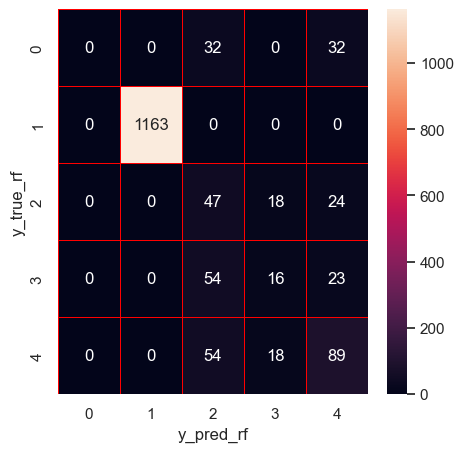

In [41]:
y_pred_rf = rf.predict(X_test)
y_true_rf = Y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sb.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

In [42]:
import pickle

# save the iris classification model as a pickle file
logisticRmodel_pkl_file = "gill_color_classifier_LR_model.pkl"  
SVMmodel_pkl_file = "gill_color_classifier_SVM_model.pkl"  
DTree_model_pkl_file = "gill_color_classifier_DTree_model.pkl"  
randomForest_model_pkl_file = "gill_color_classifier_RF_model.pkl"

with open(logisticRmodel_pkl_file, 'wb') as file:  
    pickle.dump(lr, file)

with open(SVMmodel_pkl_file, 'wb') as file:  
    pickle.dump(SVM, file)

with open(DTree_model_pkl_file, 'wb') as file:  
    pickle.dump(D_tree, file)

with open(randomForest_model_pkl_file, 'wb') as file:  
    pickle.dump(forest_class, file)

In [52]:
def predict(data, model):
    clf = pickle.load(open(model,'rb'))
    return clf.predict(data)

In [53]:
predict(X_test, "gill_color_classifier_DTree_model.pkl")

array([2, 2, 2, ..., 2, 1, 2])

In [46]:
import streamlit as st

In [ ]:
st.title('Classifying Mushroom Gill Color')
st.markdown('Predicting mushrooms gill color')